# Multidimensional SD Models

This document illustrates how vector- or matrix-valued SD Models can be defined.

We start with some boilerplate to get a BPTK project up and running:

In [5]:
from BPTK_Py import Model
from BPTK_Py.bptk import bptk

bptk=bptk()
model = Model(starttime = 0.0, stoptime= 15.0, dt= 1.0, name="TestModel")

This is already enough to define arrayed components. 

## How to define arrayed components

There are two options for arrayed components:
- Vectors (one dimensional arrays)
- Matrices (two dimensional arrays)

Moreover, both types of arrays - Vectors and Matrices - can be setup:
- using numerical indices
- using string-valued indices (named arrays)

Lets have a look at some examples:

In [4]:
## Defining a Vector (with numerical indices)
# Define an sd dsl element
vector1 = model.converter("vector1")

# Create a vector of lenght 2 with different values
vector1.setup_vector(2, [2.0, 3.0])

# Create a vector of lenght 2 with identical values
vector1.setup_vector(2, 3.0)

In [5]:
## Defining a named Vector (with string-valued indices)
# Define an sd dsl element
vector2 = model.converter("vector2")

# Create a named vector of lenght 2 using string-valued indices
vector2.setup_named_vector({"value1": 4.0, "value2": 5.0})

As you can see, we need two parameters for setting up a Vector using numerical indices:
- size (Integer): Defines the length of the array
- values (Float/Integer or list of Float/Integer): Defines the values of the Vector elements

And we need one parameter for setting up a Vector-using string indices:
- values (Dictionary): Defines the string-values indices and their values

For matrices, we can proceed completely similar.

In [6]:
## Defining a Matrix (with numerical indices)
# Define an sd dsl element
matrix1 = model.converter("matrix1")

# Create a matrix of size 2x2 with different values
matrix1.setup_matrix([2,2], [[2.0, 3.0], [4.0, 5.0]])

In [10]:
## Defining a named Matrix (with string-valued indices)
# Define an sd dsl element
matrix2 = model.converter("matrix2")

# Create a named vector of lenght 2 using string-valued indices
matrix2.setup_named_matrix({"value1": {"value11": 2.0, "value12": 3.0}, "value2": {"value21": 4.0, "value22": 5.0}})

As you can see, we need two parameters for setting up a Matrix using numerical indices:
- size (List of two Integers): Defines the size of the Matrix
- values (List of Lists containing Float/Integers): Defines the values of the Matrix elements

and we need one parameter for setting up a Matrix using string-valued indices:
- values (Dictionary): Defines the string valued indices and their values 

## Plotting arrayed Components

Similar to one-dimensional SD DSL elements, we can also plot these elements.
Lets have a look:

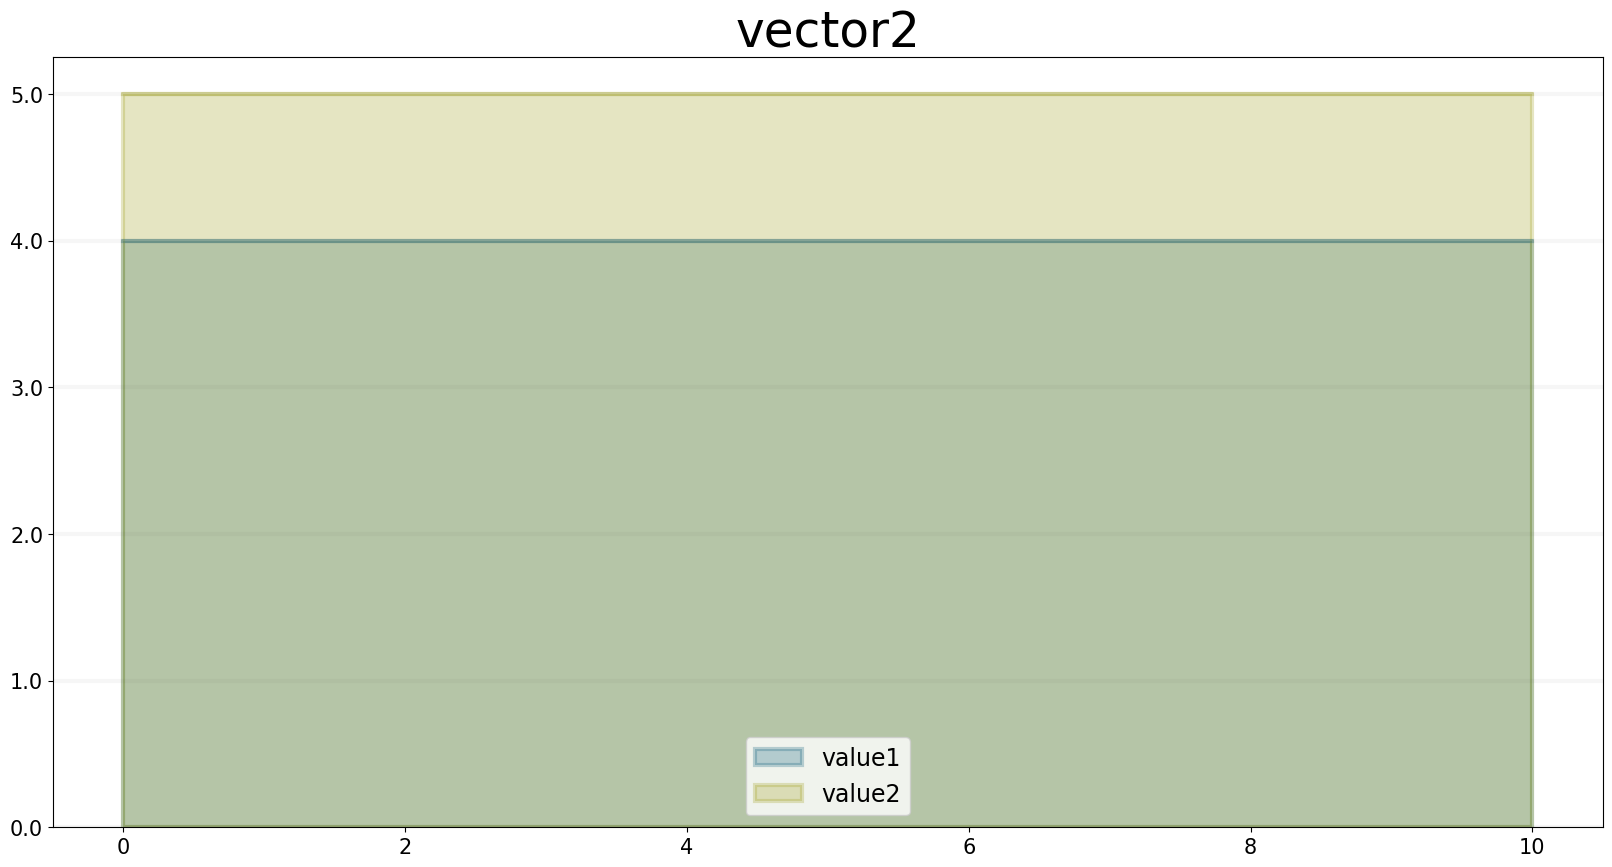

In [7]:
vector2.plot()

As you can see, both elements of the Vector are plotted. 

If you want to plot the values of the Matrix, you need to specify the first index.

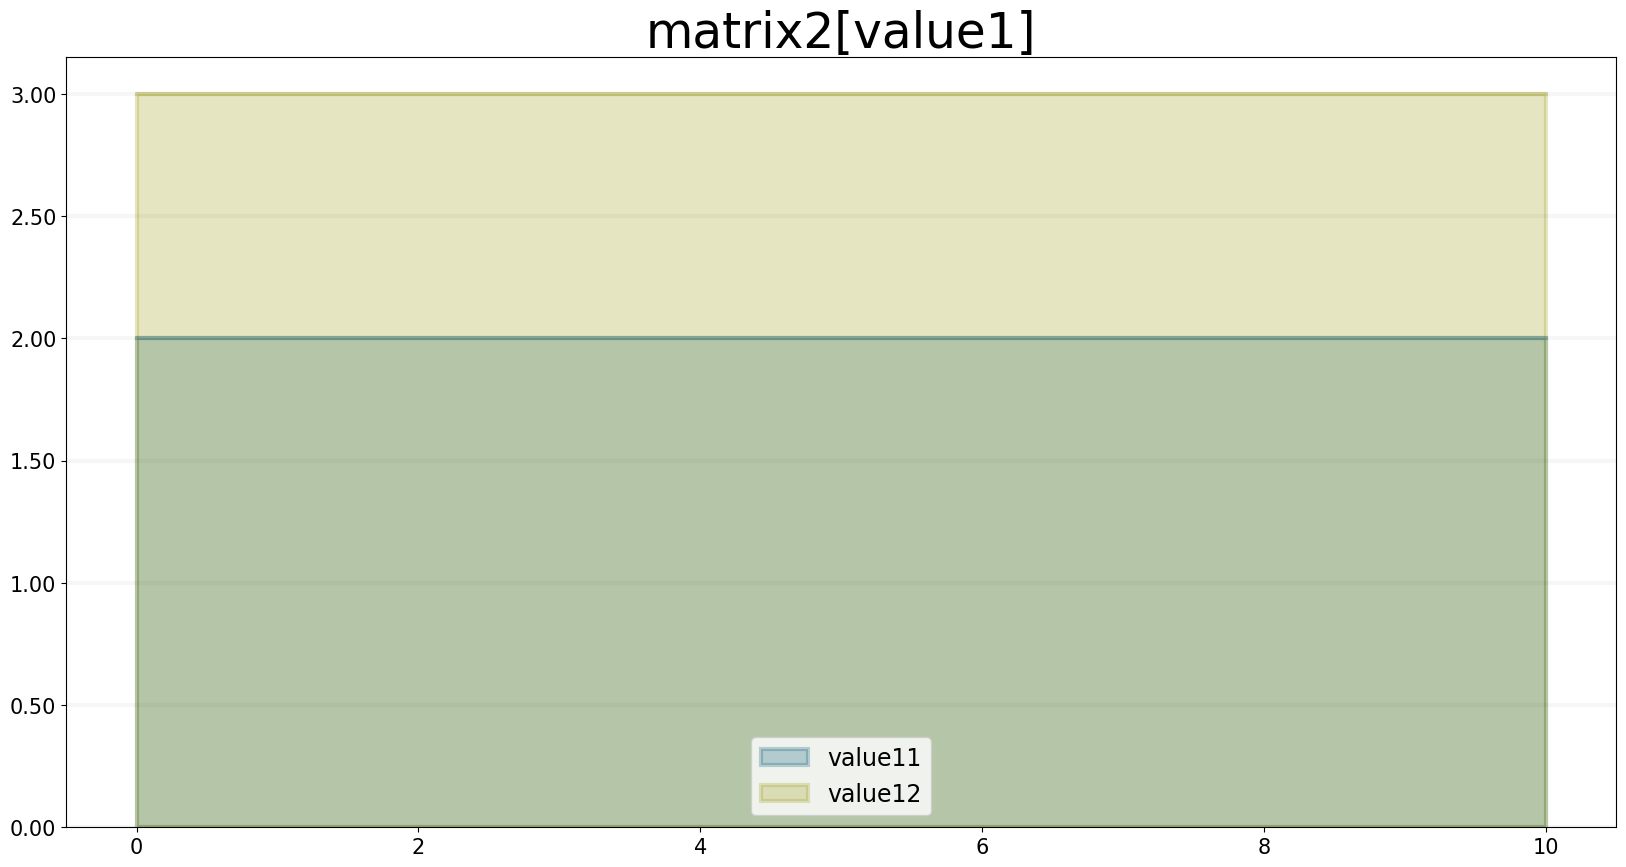

In [11]:
matrix2["value1"].plot()

Hier fehlen noch: 
- Erläuterungen zu verschiedenen rechenoperatoren
- überschreiben von constants (auch im Beispiel unten ergänzen)

## A simple Example

Lets have a look on a concrete example, how a multidimensional SD Model can look like.

Consider an investment depot with two accounts:
- bank account
- depot account

Both accounts will have different deposit rates and different interest rates each year.
We want to investigate the value development of the bank account, the depot account and the whole investment depot.

Lets set up the model:

In [6]:
account = model.stock("account")

#define the initial values of the accounts
account.setup_named_vector({"bank" : 1000.0, "depot": 500.0})

#define the interest rates
interestRate = model.constant("interestRate")
interestRate.setup_named_vector({"bank" : 0.02, "depot": 0.1})

#define the flows
deposit = model.flow("deposit")
deposit.setup_named_vector({"bank" : 200.0, "depot": 100.0})

interest = model.flow("interesst")
interest.equation = account * interestRate

#set the equation for the stock value
account.equation = deposit + interest

#finally define a converter for the total value of the account
totalValue = model.converter("totalValue")
totalValue.equation = account.arr_sum()

As always we define a scenario manager and scenarios:

In [8]:
scenario_manager = {"sm": {"model": model}}

bptk.register_scenario_manager(scenario_manager)
bptk.register_scenarios(
    scenario_manager="sm",
    scenarios=
    {
        "testScenario":{}
    }
)

And plot the results:

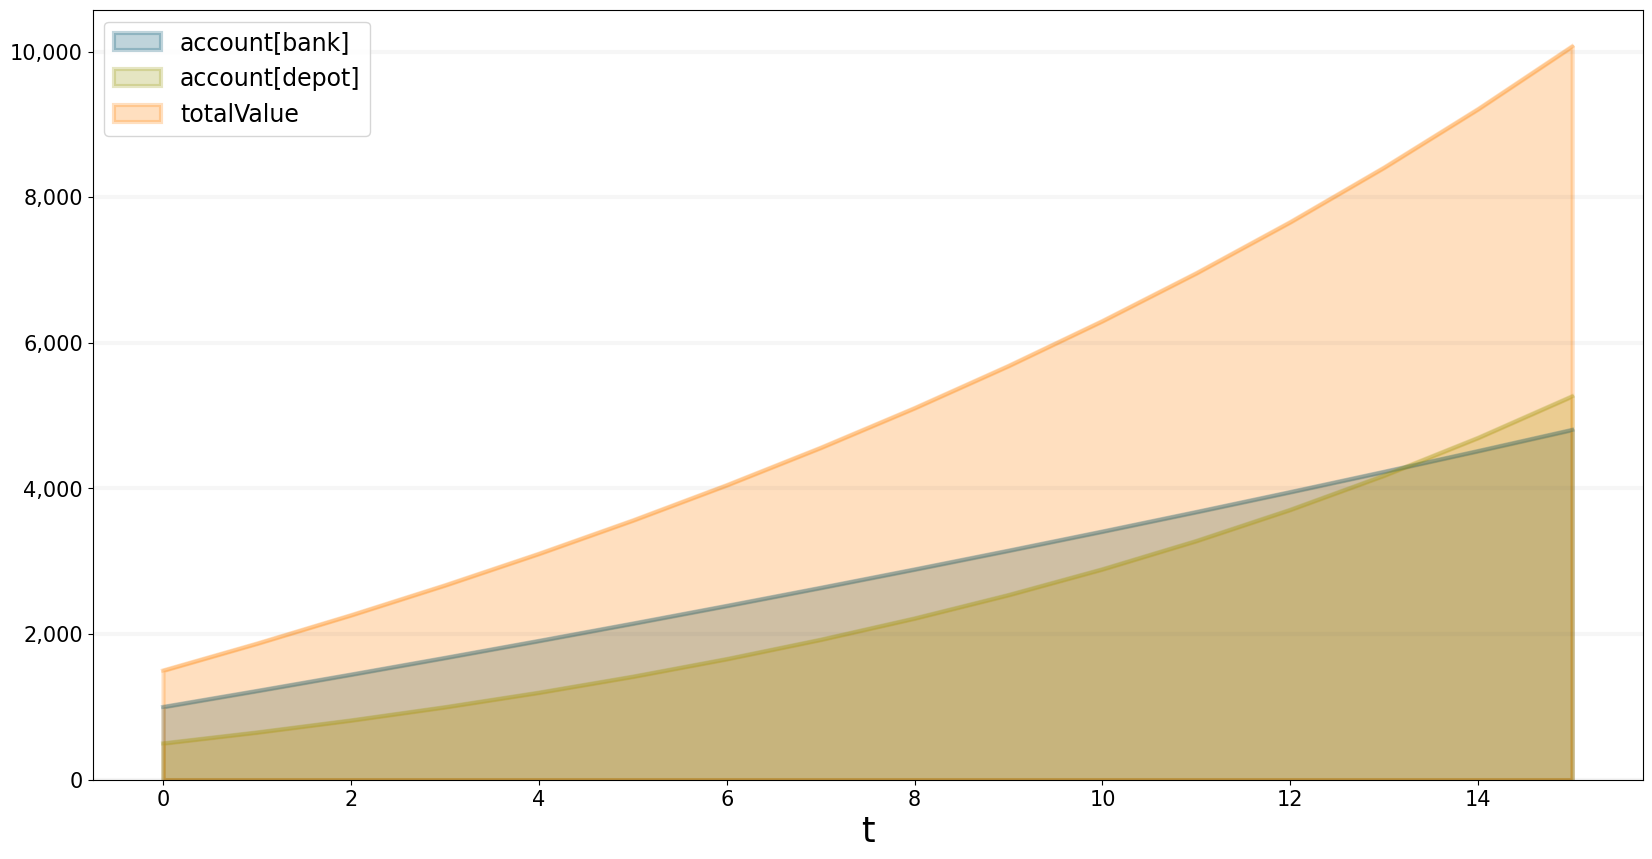

In [11]:
bptk.plot_scenarios(
    scenarios=["testScenario"],
    scenario_managers="sm",
    equations=["account[bank]", "account[depot]", "totalValue"],
    series_names={}
)